<a href="https://colab.research.google.com/github/FabianaHernande/Exerc-cios-Frequ-ncias-e-Medidas/blob/main/%5BExerc%C3%ADcios%5D_Frequ%C3%AAncias_e_Medidas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
file_id = "1hkoEukeIex3qr1nVjsZvThSPErXE_c7t"


In [ ]:
url = f'/content/drive/My Drive/Colab Notebooks/enem_2023.json'

In [ ]:
# bibliotecas base
import pandas as pd
import numpy as np
# bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
# bibliotecas para estatística
from scipy.stats import skew

Estatística Frequências e Medidas

Desafio Final

Considerando a base de dados de enem_2023.json responda as questões
abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da base
de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante. O dado possui 6 colunas, 5 delas representam
as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No
dado existe a representação de 1000 pessoas, sendo cada uma delas uma
linha.

1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
# importando a base de dados
df_enem_2023 = pd.read_json(url)
df_enem_2023

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
...,...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,NaN,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher
997,551.173161,568.769704,508.034658,NaN,798.408655,Homem
998,495.804002,522.125008,414.167228,451.696456,593.392939,Homem


In [ ]:
# Remover a coluna de gênero
df_disciplinas = df_enem_2023.drop(columns=["Sexo"])
df_disciplinas

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
0,585.669300,686.512178,390.482473,452.281333,546.371706
1,359.384608,642.084134,NaN,412.205207,741.825256
2,622.732384,495.510719,443.183580,669.683401,684.515750
3,350.164605,602.041588,413.979810,676.608952,671.237114
4,384.093657,489.249140,609.758123,520.426698,744.375048
...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,NaN
996,457.755594,444.616952,542.028624,419.689692,715.984249
997,551.173161,568.769704,508.034658,NaN,798.408655
998,495.804002,522.125008,414.167228,451.696456,593.392939


In [ ]:
# caclculando amplitudes
df_amplitudes = df_disciplinas.max() - df_disciplinas.min()
df_amplitudes

,0
Linguagens,517.456317
Ciências humanas,474.019695
Ciências da natureza,487.604568
Matemática,488.077902
Redação,729.160035


In [ ]:
# Encontrar a disciplina com a maior amplitude
df_disciplina_maior_amplitude = df_amplitudes.idxmax()
df_maior_amplitude = df_amplitudes.max()


print(f"A disciplina com maior amplitude é {df_disciplina_maior_amplitude} com amplitude de {df_maior_amplitude:.2f}")

A disciplina com maior amplitude é Redação com amplitude de 729.16


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
# media
df_medias = df_disciplinas.mean()
df_medias

,0
Linguagens,514.524809
Ciências humanas,527.042281
Ciências da natureza,499.315583
Matemática,535.965660
Redação,637.783532


In [ ]:
# mediana
df_medianas = df_disciplinas.median(skipna=True)
df_medianas

,0
Linguagens,515.045250
Ciências humanas,524.519920
Ciências da natureza,500.479263
Matemática,533.247767
Redação,635.273973


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?

In [ ]:
# Definir os pesos das disciplinas
pesos = {
    "Redação": 2,
    "Matemática": 4,
    "Linguagens": 2,
    "Ciências humanas": 1,
    "Ciências da natureza": 1
}

In [ ]:
# Calcular a nota final ponderada
df_disciplinas["Nota Final"] = (
    df_disciplinas["Redação"] * pesos["Redação"] +
    df_disciplinas["Matemática"] * pesos["Matemática"] +
    df_disciplinas["Linguagens"] * pesos["Linguagens"] +
    df_disciplinas["Ciências humanas"] * pesos["Ciências humanas"] +
    df_disciplinas["Ciências da natureza"] * pesos["Ciências da natureza"]
) / sum(pesos.values())

In [ ]:
# Selecionar os 500 melhores estudantes
df_top_500 = df_disciplinas.nlargest(500, "Nota Final")
df_top_500

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Nota Final
25,604.825455,447.532353,523.041011,727.181224,870.464077,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,658.597791
...,...,...,...,...,...,...
400,515.892318,398.431513,440.731835,522.484700,478.946903,491.878059
160,539.397184,608.405447,314.400000,507.648230,440.950905,491.409454
529,416.114140,438.110249,429.881954,462.605411,679.843696,491.032952
386,537.838737,570.471430,584.935736,437.841844,459.122741,490.069750


In [ ]:
# calcular desvio padrão
df_desvio_top500 = df_top_500["Nota Final"].std()

print(f"Desvio padrão dos 500 melhores: {df_desvio_top500:.2f}")

Desvio padrão dos 500 melhores: 40.44


In [ ]:
# calcular a média
df_media_top500 = df_top_500["Nota Final"].mean()

print(f"Média dos 500 melhores: {df_media_top500:.2f}")

Média dos 500 melhores: 557.29


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [ ]:
# Selecionar os 40 primeiros (os aprovados no curso)
df_aprovados = df_top_500.nlargest(40, "Nota Final")
df_aprovados

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Nota Final
25,604.825455,447.532353,523.041011,727.181224,870.464077,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,658.597791
880,671.524266,590.780179,546.595272,571.607337,909.379934,658.561320
376,364.096042,582.024626,523.764760,749.912621,872.188740,657.800943
989,462.051713,512.986241,506.405210,787.771672,692.814673,648.021091
694,497.493880,609.839007,528.413513,737.175029,693.739043,646.941848
965,660.913894,613.882660,433.935910,580.908082,881.465882,645.621045


In [ ]:
# Calculando a variancia (variancia amostral)
df_variancia_aprovados = df_aprovados["Nota Final"].var(ddof=1)

print(f"Variância das notas dos 40 aprovados: {df_variancia_aprovados:.2f}")

Variância das notas dos 40 aprovados: 295.77


In [ ]:
# calculando a média
df_media_aprovados = df_aprovados["Nota Final"].mean()

print(f"Média das notas dos 40 aprovados: {df_media_aprovados:.2f}")

Média das notas dos 40 aprovados: 636.68


5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática
e linguagens?

In [ ]:
# Calcular o terceiro quartil (Q3) para Matemática
df_q3_matematica = df_disciplinas["Matemática"].quantile(0.75)

print(f"O terceiro quartil para Matemática é: {df_q3_matematica:.2f}")

O terceiro quartil para Matemática é: 592.91


In [ ]:
# Calcular o terceiro quartil (Q3) para Linguagens
df_q3_linguagens = df_disciplinas["Linguagens"].quantile(0.75)

print(f"O terceiro quartil para Linguagens é: {df_q3_linguagens:.2f}")

O terceiro quartil para Linguagens é: 571.64


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique se
não assimétricas?

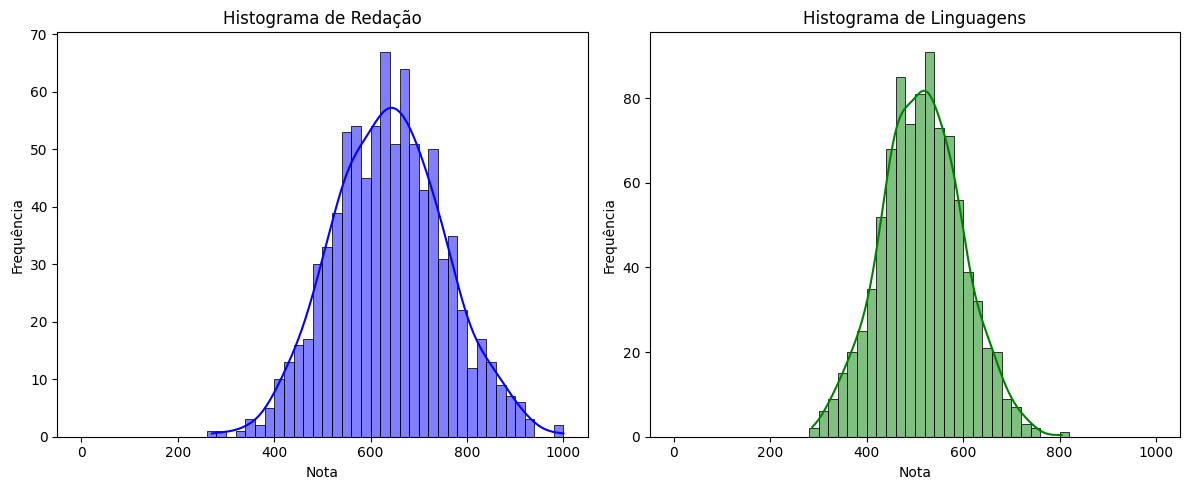

Coeficiente de assimetria para Redação: 0.07
Coeficiente de assimetria para Linguagens: 0.08


In [ ]:
# Criar histogramas com bins de 20 em 20 pontos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma para Redação
sns.histplot(df_disciplinas["Redação"], bins=range(0, 1001, 20), kde=True, ax=axes[0], color="blue")
axes[0].set_title("Histograma de Redação")
axes[0].set_xlabel("Nota")
axes[0].set_ylabel("Frequência")

# Histograma para Linguagens
sns.histplot(df_disciplinas["Linguagens"], bins=range(0, 1001, 20), kde=True, ax=axes[1], color="green")
axes[1].set_title("Histograma de Linguagens")
axes[1].set_xlabel("Nota")
axes[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()

# Calcular o coeficiente de assimetria (skewness)
df_assimetria_redacao = skew(df_disciplinas["Redação"], nan_policy='omit')
df_assimetria_linguagens = skew(df_disciplinas["Linguagens"], nan_policy='omit')

# Exibir os coeficientes de assimetria
print(f"Coeficiente de assimetria para Redação: {df_assimetria_redacao:.2f}")
print(f"Coeficiente de assimetria para Linguagens: {df_assimetria_linguagens:.2f}")

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

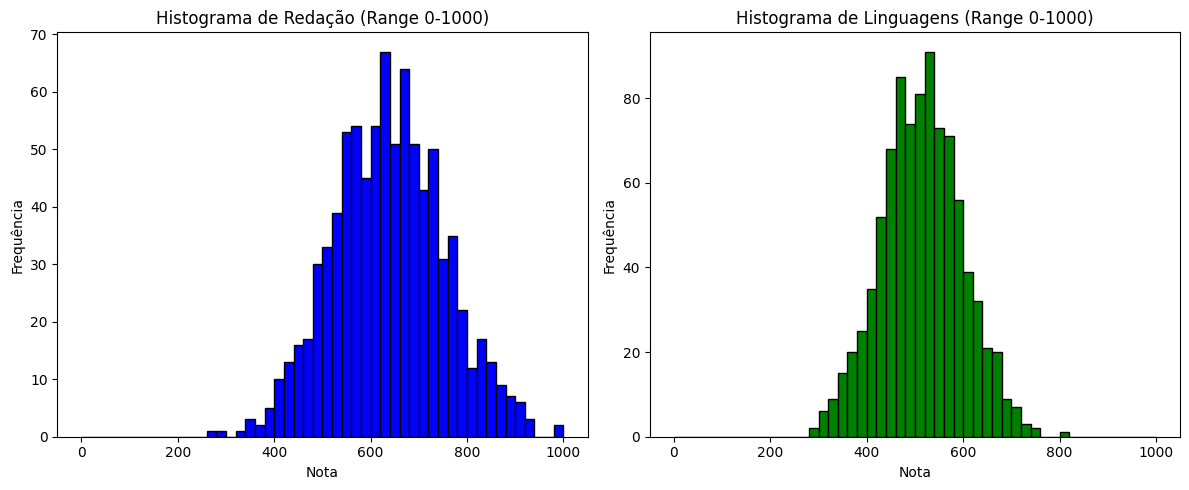

Coeficiente de assimetria para Redação: 0.07
Coeficiente de assimetria para Linguagens: 0.08


In [ ]:
# Criar a figura com 2 gráficos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de Redação com range fixo
axes[0].hist(df_disciplinas["Redação"], bins=50, range=[0, 1000], color="blue", edgecolor="black")
axes[0].set_title("Histograma de Redação (Range 0-1000)")
axes[0].set_xlabel("Nota")
axes[0].set_ylabel("Frequência")

# Histograma de Linguagens com range fixo
axes[1].hist(df_disciplinas["Linguagens"], bins=50, range=[0, 1000], color="green", edgecolor="black")
axes[1].set_title("Histograma de Linguagens (Range 0-1000)")
axes[1].set_xlabel("Nota")
axes[1].set_ylabel("Frequência")

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()

# Calcular assimetria novamente
df_assimetria_redacao_range_fixo = skew(df_disciplinas["Redação"], nan_policy='omit')
df_assimetria_linguagens_range_fixo = skew(df_disciplinas["Linguagens"], nan_policy='omit')

# Exibir os coeficientes de assimetria
print(f"Coeficiente de assimetria para Redação: {df_assimetria_redacao_range_fixo:.2f}")
print(f"Coeficiente de assimetria para Linguagens: {df_assimetria_linguagens_range_fixo:.2f}")

A simetria permaneceu a mesma, isso indica que os valores extremos não estavam afetando muito a percepção inicial.

8. Faça um boxplot para as notas de Ciências da Natureza e Redação,
analisando os quartis e identificando possíveis outliers. Utilize o método
IQR (Intervalo Interquartílico) para essa análise.

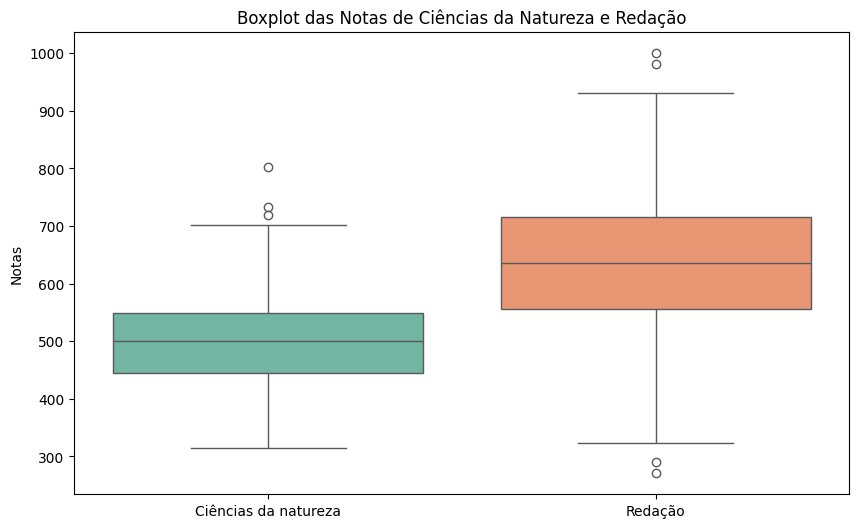

Outliers em Ciências da Natureza (abaixo do limite inferior):
Series([], Name: Ciências da natureza, dtype: float64)
Outliers em Ciências da Natureza (acima do limite superior):
Series([], Name: Ciências da natureza, dtype: float64)
Outliers em Redação (abaixo do limite inferior):
Series([], Name: Redação, dtype: float64)
Outliers em Redação (acima do limite superior):
Series([], Name: Redação, dtype: float64)


In [ ]:
# Selecionar as colunas de Ciências da Natureza e Redação
df_notas_ciencias_natureza = df_disciplinas['Ciências da natureza']
df_notas_redacao = df_disciplinas['Redação']

# Criar um DataFrame para as duas colunas
df_notas = pd.DataFrame({
    'Ciências da natureza': df_notas_ciencias_natureza,
    'Redação': df_notas_redacao
})


# Gerar o boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_notas, palette='Set2')
plt.title('Boxplot das Notas de Ciências da Natureza e Redação')
plt.ylabel('Notas')
plt.show()

# Calcular o IQR para Ciências da Natureza
df_Q1_ciencias = np.percentile(df_notas_ciencias_natureza, 25)
df_Q3_ciencias = np.percentile(df_notas_ciencias_natureza, 75)
df_IQR_ciencias = df_Q3_ciencias - df_Q1_ciencias

# Calcular o IQR para Redação
df_Q1_redacao = np.percentile(df_notas_redacao, 25)
df_Q3_redacao = np.percentile(df_notas_redacao, 75)
IQR_redacao = df_Q3_redacao - df_Q1_redacao

# Identificar outliers para Ciências da Natureza
df_outliers_ciencias_lower = df_notas_ciencias_natureza[df_notas_ciencias_natureza < (df_Q1_ciencias - 1.5 * df_IQR_ciencias)]
df_outliers_ciencias_upper = df_notas_ciencias_natureza[df_notas_ciencias_natureza > (df_Q3_ciencias + 1.5 * df_IQR_ciencias)]

# Identificar outliers para Redação
df_outliers_redacao_lower = df_notas_redacao[df_notas_redacao < (df_Q1_redacao - 1.5 * IQR_redacao)]
df_outliers_redacao_upper = df_notas_redacao[df_notas_redacao > (df_Q3_redacao + 1.5 * IQR_redacao)]

# Exibir os outliers
print(f'Outliers em Ciências da Natureza (abaixo do limite inferior):\n{df_outliers_ciencias_lower}')
print(f'Outliers em Ciências da Natureza (acima do limite superior):\n{df_outliers_ciencias_upper}')
print(f'Outliers em Redação (abaixo do limite inferior):\n{df_outliers_redacao_lower}')
print(f'Outliers em Redação (acima do limite superior):\n{df_outliers_redacao_upper}')

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um valor
acima de 5%)

In [ ]:
# Selecionar as colunas de Ciências da Natureza e Redação
notas_ciencias_natureza = df_disciplinas['Ciências da natureza']
notas_redacao = df_disciplinas['Redação']

# Calcular o IQR para Ciências da Natureza
Q1_ciencias = np.percentile(notas_ciencias_natureza, 25)
Q3_ciencias = np.percentile(notas_ciencias_natureza, 75)
IQR_ciencias = Q3_ciencias - Q1_ciencias

# Calcular o IQR para Redação
Q1_redacao = np.percentile(notas_redacao, 25)
Q3_redacao = np.percentile(notas_redacao, 75)
IQR_redacao = Q3_redacao - Q1_redacao

# Identificar outliers para Ciências da Natureza
outliers_ciencias_lower = notas_ciencias_natureza < (Q1_ciencias - 1.5 * IQR_ciencias)
outliers_ciencias_upper = notas_ciencias_natureza > (Q3_ciencias + 1.5 * IQR_ciencias)

# Identificar outliers para Redação
outliers_redacao_lower = notas_redacao < (Q1_redacao - 1.5 * IQR_redacao)
outliers_redacao_upper = notas_redacao > (Q3_redacao + 1.5 * IQR_redacao)

# Combinar os outliers para ambas as colunas
outliers_ciencias = outliers_ciencias_lower | outliers_ciencias_upper
outliers_redacao = outliers_redacao_lower | outliers_redacao_upper

# Remover os outliers
df_sem_outliers = df_disciplinas[~(outliers_ciencias | outliers_redacao)]

# Calcular a média antes de remover os outliers
media_ciencias_natureza_original = notas_ciencias_natureza.mean()
media_redacao_original = notas_redacao.mean()

# Calcular a média após remover os outliers
media_ciencias_natureza_sem_outliers = df_sem_outliers['Ciências da natureza'].mean()
media_redacao_sem_outliers = df_sem_outliers['Redação'].mean()

# Calcular a diferença percentual na média
diff_media_ciencias = ((media_ciencias_natureza_original - media_ciencias_natureza_sem_outliers) / media_ciencias_natureza_original) * 100
diff_media_redacao = ((media_redacao_original - media_redacao_sem_outliers) / media_redacao_original) * 100

# Exibir as médias e as diferenças
print(f'Média original Ciências da Natureza: {media_ciencias_natureza_original}')
print(f'Média sem outliers Ciências da Natureza: {media_ciencias_natureza_sem_outliers}')
print(f'Diferença percentual na média de Ciências da Natureza: {diff_media_ciencias:.2f}%')

print(f'Média original Redação: {media_redacao_original}')
print(f'Média sem outliers Redação: {media_redacao_sem_outliers}')
print(f'Diferença percentual na média de Redação: {diff_media_redacao:.2f}%')

# Verificar se a diferença é significativa (maior que 5%)
if diff_media_ciencias > 5:
    print('A remoção dos outliers em Ciências da Natureza alterou a média de forma significativa (>5%)')
else:
    print('A remoção dos outliers em Ciências da Natureza não alterou a média de forma significativa')

if diff_media_redacao > 5:
    print('A remoção dos outliers em Redação alterou a média de forma significativa (>5%)')
else:
    print('A remoção dos outliers em Redação não alterou a média de forma significativa')

Média original Ciências da Natureza: 499.3155828489798
Média sem outliers Ciências da Natureza: 499.3155828489798
Diferença percentual na média de Ciências da Natureza: 0.00%
Média original Redação: 637.7835320695872
Média sem outliers Redação: 637.7835320695872
Diferença percentual na média de Redação: 0.00%
A remoção dos outliers em Ciências da Natureza não alterou a média de forma significativa
A remoção dos outliers em Redação não alterou a média de forma significativa


10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou mediana?
Substitua o valor por todos os três e diga qual delas altera menos a média
geral e o desvio padrão.

In [ ]:
# Verificar valores nulos
print("Valores nulos antes de qualquer substituição:")
print(df_disciplinas.isnull().sum())

# Identificar as colunas de interesse
notas_ciencias_natureza = df_disciplinas['Ciências da natureza']
notas_redacao = df_disciplinas['Redação']

# Calcular a média, moda e mediana para Ciências da Natureza
media_ciencias = notas_ciencias_natureza.mean()
moda_ciencias = notas_ciencias_natureza.mode()[0]  # Pega a moda (o primeiro valor, no caso de múltiplas modas)
mediana_ciencias = notas_ciencias_natureza.median()

# Calcular a média, moda e mediana para Redação
media_redacao = notas_redacao.mean()
moda_redacao = notas_redacao.mode()[0]
mediana_redacao = notas_redacao.median()

# Função para calcular a diferença entre média e desvio padrão antes e depois da substituição
def calc_diferenca_media_desvio(df_original, df_modificado, col_name):
    media_original = df_original[col_name].mean()
    desvio_original = df_original[col_name].std()

    media_modificada = df_modificado[col_name].mean()
    desvio_modificado = df_modificado[col_name].std()

    # Calcular as diferenças
    diff_media = abs(media_original - media_modificada)
    diff_desvio = abs(desvio_original - desvio_modificado)

    return diff_media, diff_desvio

# Substituir valores nulos pela média
df_media = df_disciplinas.copy()
df_media.fillna({'Ciências da natureza': media_ciencias}, inplace=True)
df_media.fillna({'Redação': media_redacao}, inplace=True)
#df_media['Ciências da natureza'].fillna(media_ciencias, inplace=True)
#df_media['Redação'].fillna(media_redacao, inplace=True)

# Substituir valores nulos pela moda
df_moda = df_disciplinas.copy()
df_moda.fillna({'Ciências da natureza': moda_ciencias}, inplace=True)
df_moda.fillna({'Redação': moda_redacao}, inplace=True)
# df_moda['Ciências da natureza'].fillna(moda_ciencias, inplace=True)
# df_moda['Redação'].fillna(moda_redacao, inplace=True)

# Substituir valores nulos pela mediana
df_mediana = df_disciplinas.copy()
df_mediana.fillna({'Ciências da natureza': mediana_ciencias}, inplace=True)
df_mediana.fillna({'Redação': mediana_redacao}, inplace=True)
# df_mediana['Ciências da natureza'].fillna(mediana_ciencias, inplace=True)
# df_mediana['Redação'].fillna(mediana_redacao, inplace=True)

# Calcular a diferença na média e no desvio padrão para cada substituição
diff_media_media, diff_desvio_media = calc_diferenca_media_desvio(df_disciplinas, df_media, 'Ciências da natureza')
diff_media_moda, diff_desvio_moda = calc_diferenca_media_desvio(df_disciplinas, df_moda, 'Ciências da natureza')
diff_media_mediana, diff_desvio_mediana = calc_diferenca_media_desvio(df_disciplinas, df_mediana, 'Ciências da natureza')

print("\nComparação das mudanças na média e desvio padrão para Ciências da Natureza:")

print(f"Substituição com Média:")
print(f"Diferença na Média: {diff_media_media}, Diferença no Desvio Padrão: {diff_desvio_media}")

print(f"Substituição com Moda:")
print(f"Diferença na Média: {diff_media_moda}, Diferença no Desvio Padrão: {diff_desvio_moda}")

print(f"Substituição com Mediana:")
print(f"Diferença na Média: {diff_media_mediana}, Diferença no Desvio Padrão: {diff_desvio_mediana}")

# Repetir para a coluna de Redação
diff_media_media, diff_desvio_media = calc_diferenca_media_desvio(df_disciplinas, df_media, 'Redação')
diff_media_moda, diff_desvio_moda = calc_diferenca_media_desvio(df_disciplinas, df_moda, 'Redação')
diff_media_mediana, diff_desvio_mediana = calc_diferenca_media_desvio(df_disciplinas, df_mediana, 'Redação')

print("\nComparação das mudanças na média e desvio padrão para Redação:")

print(f"Substituição com Média:")
print(f"Diferença na Média: {diff_media_media}, Diferença no Desvio Padrão: {diff_desvio_media}")

print(f"Substituição com Moda:")
print(f"Diferença na Média: {diff_media_moda}, Diferença no Desvio Padrão: {diff_desvio_moda}")

print(f"Substituição com Mediana:")
print(f"Diferença na Média: {diff_media_mediana}, Diferença no Desvio Padrão: {diff_desvio_mediana}")

Valores nulos antes de qualquer substituição:
Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Nota Final              452
dtype: int64

Comparação das mudanças na média e desvio padrão para Ciências da Natureza:
Substituição com Média:
Diferença na Média: 5.684341886080802e-14, Diferença no Desvio Padrão: 7.273727142566983
Substituição com Moda:
Diferença na Média: 32.54514258142052, Diferença no Desvio Padrão: 21.61004270250099
Substituição com Mediana:
Diferença na Média: 0.2048077181339636, Diferença no Desvio Padrão: 7.2723522067850865

Comparação das mudanças na média e desvio padrão para Redação:
Substituição com Média:
Diferença na Média: 0.0, Diferença no Desvio Padrão: 8.386797541732136
Substituição com Moda:
Diferença na Média: 51.37209940927221, Diferença no Desvio Padrão: 50.99336225693821
Substituição com Mediana:
Diferença na Média: 0.35133824253318835, Diferença no Desvio Padrão: 

Conclusão:
- Para Ciências da Natureza, a substituição pela média altera menos a média e o desvio padrão, com diferença quase nula na média e uma pequena diferença no desvio padrão.
- Para Redação, a substituição pela média também é a melhor opção, pois não altera a média (diferença zero) e altera ligeiramente o desvio padrão.

Portanto, substituir os valores nulos pela média é a melhor escolha, pois altera menos a média geral e o desvio padrão em ambas as disciplinas.